In [234]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import datasets
from scipy.signal import convolve2d

In [235]:
def load_MNIST_data(data_path, fashion=False, quiet=False):
    if not fashion:
        train_set = datasets.MNIST(data_path, download=True, train=True)
        test_set = datasets.MNIST(data_path, download=True, train=False)
    else:
        train_set = datasets.FashionMNIST(data_path, download=True, train=True)
        test_set = datasets.FashionMNIST(data_path, download=True, train=False)      
    x_train = train_set.data.numpy()
    y_train = train_set.targets.numpy()

    x_test = test_set.data.numpy()
    y_test = test_set.targets.numpy()
    
    N_train, H, W = x_train.shape
    N_test, H, W = x_test.shape

    if not quiet:
        print(f'The data are {H} x {W} grayscale images.')
        print(f'N_train = {N_train}')
        print(f'N_test = {N_test}')
    for i in set(y_train):
        N_i_train = np.sum(y_train==i)
        N_i_test = np.sum(y_test==i)
        if not quiet:
            print(f'Class {i}: has {N_i_train} train images ({100 * N_i_train / N_train : .2f} %), {N_i_test} test images ({100 * N_i_test/ N_test : .2f} %) ')
    return x_train, y_train, x_test, y_test

In [236]:
USE_FASHION_MNIST = False

x_train, y_train, x_test, y_test = load_MNIST_data('./data/', fashion=USE_FASHION_MNIST, quiet=False)


if USE_FASHION_MNIST:
    tag_name = 'FashionMNIST'
    label_names = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
else:
    tag_name = 'MNIST'
    label_names = [f'{i}' for i in set(y_test)]

The data are 28 x 28 grayscale images.
N_train = 60000
N_test = 10000
Class 0: has 5923 train images ( 9.87 %), 980 test images ( 9.80 %) 
Class 1: has 6742 train images ( 11.24 %), 1135 test images ( 11.35 %) 
Class 2: has 5958 train images ( 9.93 %), 1032 test images ( 10.32 %) 
Class 3: has 6131 train images ( 10.22 %), 1010 test images ( 10.10 %) 
Class 4: has 5842 train images ( 9.74 %), 982 test images ( 9.82 %) 
Class 5: has 5421 train images ( 9.04 %), 892 test images ( 8.92 %) 
Class 6: has 5918 train images ( 9.86 %), 958 test images ( 9.58 %) 
Class 7: has 6265 train images ( 10.44 %), 1028 test images ( 10.28 %) 
Class 8: has 5851 train images ( 9.75 %), 974 test images ( 9.74 %) 
Class 9: has 5949 train images ( 9.91 %), 1009 test images ( 10.09 %) 


<Figure size 640x480 with 0 Axes>

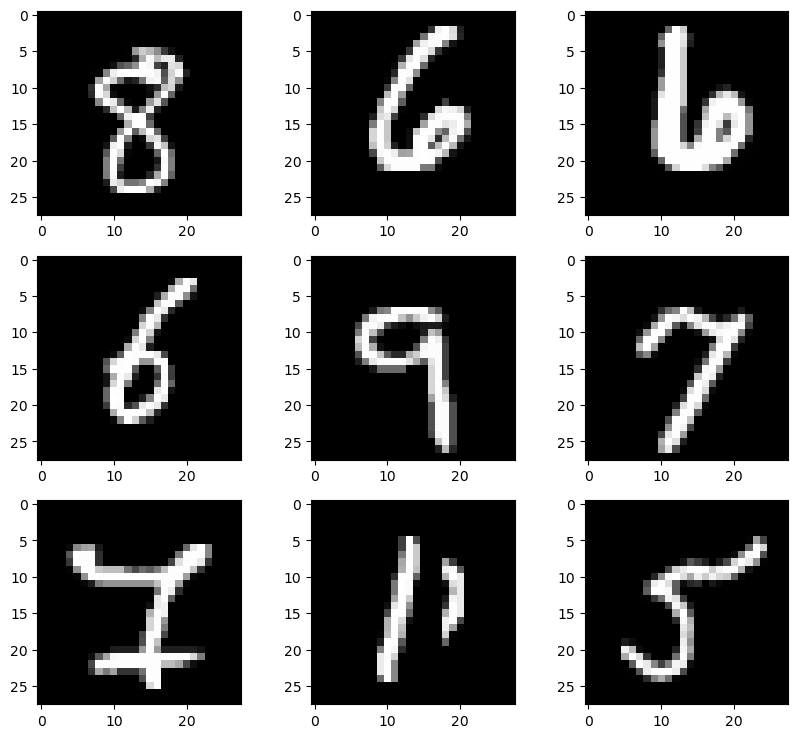

In [237]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    index = np.random.randint(low=0, high=len(y_train), dtype=int)
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[index])
plt.show()

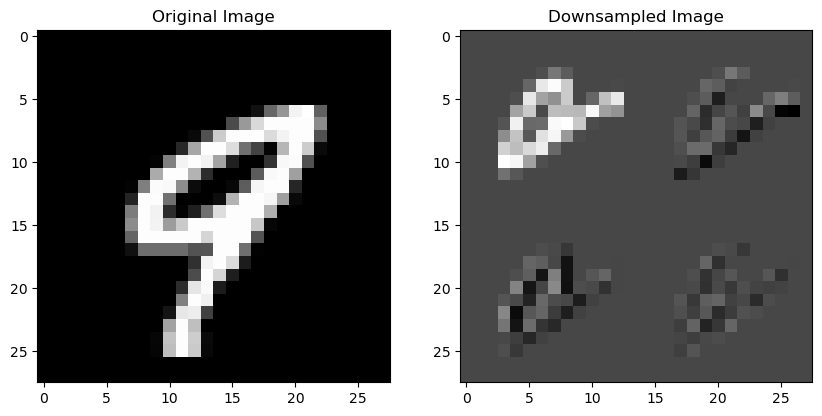

In [238]:
# perform downsampling by 2x2 with every originsl data in train and test set
H_HL = np.array([[1, -1], [1, -1]])     ## define 2x2 impulse response
H_LL = np.array([[1, 1], [1, 1]])     
H_LH = np.array([[1, 1], [-1, -1]])     
H_HH = np.array([[1, -1], [-1, 1]])     
x_train_HH = np.zeros((len(x_train), 14, 14))
x_test_HH = np.zeros((len(x_test), 14, 14))
x_train_LH = np.zeros((len(x_train), 14, 14))
x_test_LH = np.zeros((len(x_test), 14, 14))
x_train_HL = np.zeros((len(x_train), 14, 14))  
x_test_HL = np.zeros((len(x_test), 14, 14))  
x_train_LL = np.zeros((len(x_train), 14, 14))
x_test_LL = np.zeros((len(x_test), 14, 14))
x_train_con = np.zeros((len(x_train), 28, 28))
x_test_con = np.zeros((len(x_test), 28, 28))
for i in range(len(x_train)):
    x = x_train[i]
    Y_HL = convolve2d(x, H_HL)             ## perform 2D convolution, produces a 29 x 29 image because of edge effects
    x_train_HL[i] = Y_HL[1::2].T[1::2]        ## downsamples and shifts to get the desired 14 x 14 image
    Y_LL = convolve2d(x, H_LL)            
    x_train_LL[i] = Y_LL[1::2].T[1::2]       
    Y_HH = convolve2d(x, H_HH)           
    x_train_HH[i] = Y_HH[1::2].T[1::2]     
    Y_LH = convolve2d(x, H_LH)           
    x_train_LH[i] = Y_LH[1::2].T[1::2]      
    x_train_con[i] = np.concatenate((np.concatenate((x_train_LL[i], x_train_HL[i]), axis=1), np.concatenate((x_train_LH[i], x_train_HH[i]), axis=1)), axis=0)
for i in range(len(x_test)):
    x_j = x_test[i]
    Y_HL = convolve2d(x_j, H_HL)             ## perform 2D convolution, produces a 29 x 29 image because of edge effects
    x_test_HL[i] = Y_HL[1::2].T[1::2]        ## downsamples and shifts to get the desired 14 x 14 image
    Y_LL = convolve2d(x_j, H_LL)             
    x_test_LL[i] = Y_LL[1::2].T[1::2]       
    Y_HH = convolve2d(x_j, H_HH)          
    x_test_HH[i] = Y_HH[1::2].T[1::2]        
    Y_LH = convolve2d(x_j, H_LH)             
    x_test_LH[i] = Y_LH[1::2].T[1::2]     
    x_test_con[i] = np.concatenate((np.concatenate((x_test_LL[i], x_test_HL[i]), axis=1), np.concatenate((x_test_LH[i], x_test_HH[i]), axis=1)), axis=0)

# select a random image from the training set
index = np.random.randint(low=0, high=len(y_train), dtype=int)
x = x_train[index]
# display the original image and the downsampled image
plt.figure(figsize = (10,9)) # Adjusting figure size
plt.subplot(1,2,1)
plt.imshow(x)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(x_train_con[index])
plt.title('Downsampled Image')
plt.show()

In [239]:
def flatten_and_augment(x):
    N, H, W = x.shape
    D = H * W
    x_aug = np.ones((N, D + 1))
    x_aug[:, 1:] = x.reshape((N, D))
    return x_aug

def create_target_matrix(labels):
    label_vals = list(set(labels))
    C = len(label_vals)
    N = len(labels)
    y = -1 * np.ones((N, C)) 
    for n in range(N):
        y[n][labels[n]] = +1
    return y

In [240]:
x_train_aug = flatten_and_augment(x_train_con) #x_train need to be the training data with the reduced dimension
Y = create_target_matrix(y_train)

W_hat = np.linalg.lstsq(x_train_aug, Y, rcond=None)[0]
y_pred_train = np.argmax(x_train_aug @ W_hat, axis=1)
misclassified = np.where(y_pred_train != y_train)[0]
misclassification_rate = len(misclassified) / len(y_train)
print(f'Misclassification rate on the training set: {misclassification_rate}')

x_test_aug = flatten_and_augment(x_test_con) #x_test is for evaluation of the model once you obtain W_hat
# report the accuracy on the test set
y_pred_test = np.argmax(x_test_aug @ W_hat, axis=1)
misclassified = np.where(y_pred_test != y_test)[0]
misclassification_rate = len(misclassified) / len(y_test)
print(f'Misclassification rate on the test set: {misclassification_rate}')

Misclassification rate on the training set: 0.14226666666666668
Misclassification rate on the test set: 0.1397
